***Customer Churn Analysis & Prediction***

**Target Variable**: Churn

In [ ]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from pandas.core.api import DataFrame
#reading the data
df=pd.read_csv("E_Commerce_Dataset.csv")
#df = pd.read_excel('/content/E Commerce Dataset.xlsx', sheet_name='E Comm')

print("Dataset shape:", df.shape)
print("Columns:", df.columns.values)
df.head()

Dataset shape: (5630, 20)
Columns: ['CustomerID' 'Churn' 'Tenure' 'PreferredLoginDevice' 'CityTier'
 'WarehouseToHome' 'PreferredPaymentMode' 'Gender' 'HourSpendOnApp'
 'NumberOfDeviceRegistered' 'PreferedOrderCat' 'SatisfactionScore'
 'MaritalStatus' 'NumberOfAddress' 'Complain'
 'OrderAmountHikeFromlastYear' 'CouponUsed' 'OrderCount'
 'DaySinceLastOrder' 'CashbackAmount']


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [ ]:
# data types of each column
print("Data types:\n")
df.dtypes

Data types:



CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

In [ ]:
# summary statistics of dataset
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [ ]:
# check if dataset contains any NaN values
print("NaN values:")

df.isnull().sum()

NaN values:


CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
# handling Nan values
# removing rows with Nan values
new_df = df.dropna(subset=['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder'])

# ensuring Nan values do not exist

new_df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

Value counts for Churn variable: 0    3143
1     631
Name: Churn, dtype: int64


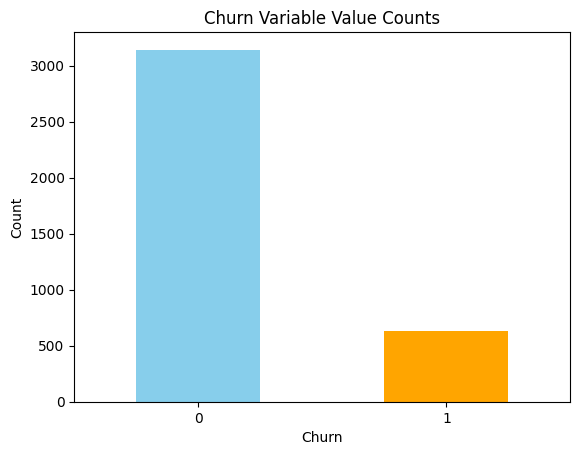

In [ ]:
# understanding target variable (Churn)
print("Value counts for Churn variable:",new_df['Churn'].value_counts())

# visualizing value counts for Churn variable
new_df['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Churn Variable Value Counts')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# dividing data based on data type

categorical = ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']
numerical = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress',
            'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'CityTier', 'SatisfactionScore','Complain']

interval = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress',
            'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

ordinal = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
nominal = ['Churn', 'CityTier', 'SatisfactionScore','Complain']

In [ ]:
# Statistics Summary for Categorical Data
new_df[categorical].describe()

,PreferredLoginDevice,PreferredPaymentMode,PreferedOrderCat,MaritalStatus
count,3774,3774,3774,3774
unique,3,7,6,3
top,Mobile Phone,Debit Card,Laptop & Accessory,Married
freq,1936,1538,1961,1982


In [ ]:
# value counts for categorical values
for col in categorical:
  print(f'''Value count Colums {col}:''')
  print(df[col].value_counts())
  print()


Value count Colums PreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Value count Colums PreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Value count Colums PreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Value count Colums MaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64



In [ ]:
# Statistics Summary for Numerical Data
new_df[numerical].describe()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CityTier,SatisfactionScore,Complain
count,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.00000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000
mean,8.776895,15.743773,2.981187,3.754107,4.216481,15.72761,1.719661,2.825384,4.526232,164.215156,1.707737,3.056439,0.282194
std,7.678508,8.594330,0.722158,1.025233,2.562142,3.62991,1.674508,2.467597,3.371310,24.089821,0.936725,1.389730,0.450127
min,0.000000,5.000000,0.000000,1.000000,1.000000,11.00000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1.000000,9.000000,2.000000,3.000000,2.000000,13.00000,1.000000,1.000000,2.000000,148.250000,1.000000,2.000000,0.000000
50%,8.000000,14.000000,3.000000,4.000000,3.000000,15.00000,1.000000,2.000000,3.000000,160.000000,1.000000,3.000000,0.000000
75%,13.000000,21.000000,3.000000,4.000000,6.000000,18.00000,2.000000,3.000000,7.000000,178.000000,3.000000,4.000000,1.000000
max,51.000000,127.000000,5.000000,6.000000,22.000000,26.00000,16.000000,16.000000,46.000000,325.000000,3.000000,5.000000,1.000000


In [ ]:
# Statistics Summary for Interval Data
new_df[interval].describe()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.00000,3774.000000,3774.000000,3774.000000,3774.000000
mean,8.776895,15.743773,2.981187,3.754107,4.216481,15.72761,1.719661,2.825384,4.526232,164.215156
std,7.678508,8.594330,0.722158,1.025233,2.562142,3.62991,1.674508,2.467597,3.371310,24.089821
min,0.000000,5.000000,0.000000,1.000000,1.000000,11.00000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,9.000000,2.000000,3.000000,2.000000,13.00000,1.000000,1.000000,2.000000,148.250000
50%,8.000000,14.000000,3.000000,4.000000,3.000000,15.00000,1.000000,2.000000,3.000000,160.000000
75%,13.000000,21.000000,3.000000,4.000000,6.000000,18.00000,2.000000,3.000000,7.000000,178.000000
max,51.000000,127.000000,5.000000,6.000000,22.000000,26.00000,16.000000,16.000000,46.000000,325.000000


In [ ]:
# Statistics Summary for Nominal Data
new_df[ordinal].describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,3774,3774,3774,3774,3774
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,1936,1538,2271,1961,1982


In [ ]:
# correlation plot to understand which variables are significant
# sns.heatmap(new_df.corr(), annot=True)
new_df.corr()

<ipython-input-14-d7794817be49>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.corr()


,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,1.000000,0.031617,-0.017339,-0.076098,0.043284,0.594250,0.387227,-0.028921,0.117903,-0.006115,0.127886,0.190832,0.099252,0.029614,0.158445
Churn,0.031617,1.000000,-0.340013,0.073858,0.087318,0.060845,0.149041,0.095759,0.076336,0.238137,0.017193,0.010982,-0.001962,-0.139254,-0.058866
Tenure,-0.017339,-0.340013,1.000000,-0.057414,-0.016353,-0.029818,-0.058752,-0.009972,0.196547,-0.035228,0.012197,0.075959,0.112339,0.118932,0.214320
CityTier,-0.076098,0.073858,-0.057414,1.000000,0.004457,-0.070035,-0.008616,-0.019494,-0.046406,-0.006122,-0.027628,0.013313,0.035018,0.014304,0.146363
WarehouseToHome,0.043284,0.087318,-0.016353,0.004457,1.000000,0.052731,0.024582,0.000434,0.003422,0.003829,0.031975,-0.014311,0.008800,0.010646,-0.013001
HourSpendOnApp,0.594250,0.060845,-0.029818,-0.070035,0.052731,1.000000,0.293021,0.039879,0.124962,0.020413,0.096827,0.160239,0.092601,0.019526,0.131377
NumberOfDeviceRegistered,0.387227,0.149041,-0.058752,-0.008616,0.024582,0.293021,1.000000,-0.017788,0.066684,0.018881,0.083342,0.114066,0.069559,-0.049817,0.113889
SatisfactionScore,-0.028921,0.095759,-0.009972,-0.019494,0.000434,0.039879,-0.017788,1.000000,0.054627,-0.044533,-0.008143,0.006687,-0.004622,0.012950,0.011671
NumberOfAddress,0.117903,0.076336,0.196547,-0.046406,0.003422,0.124962,0.066684,0.054627,1.000000,-0.017363,0.010275,-0.017851,-0.079413,-0.148784,0.096855
Complain,-0.006115,0.238137,-0.035228,-0.006122,0.003829,0.020413,0.018881,-0.044533,-0.017363,1.000000,0.003260,0.005472,-0.001917,-0.056315,0.010433


From the above table and below heapmap, we can observe that 'Churn' variable:

1.   Has positive correlation with CityTier, WarehouseToHome, NumberOfDeviceRegistered, SatisfactionScore and Complain.
2.   Has a very weak correlation (almost near 0) with HourSpendOnApp,NumberOfAddress, OrderAmoundHikeFromlastYear, CouponUsed and OrderCount. This clearly indicates that the above features may not be significant.

<ipython-input-15-6a65da98a190>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(new_df.corr(), dtype=np.bool))
<ipython-input-15-6a65da98a190>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(new_df.corr(), dtype=np.bool))
<ipython-input-15-6a65da98a190>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_

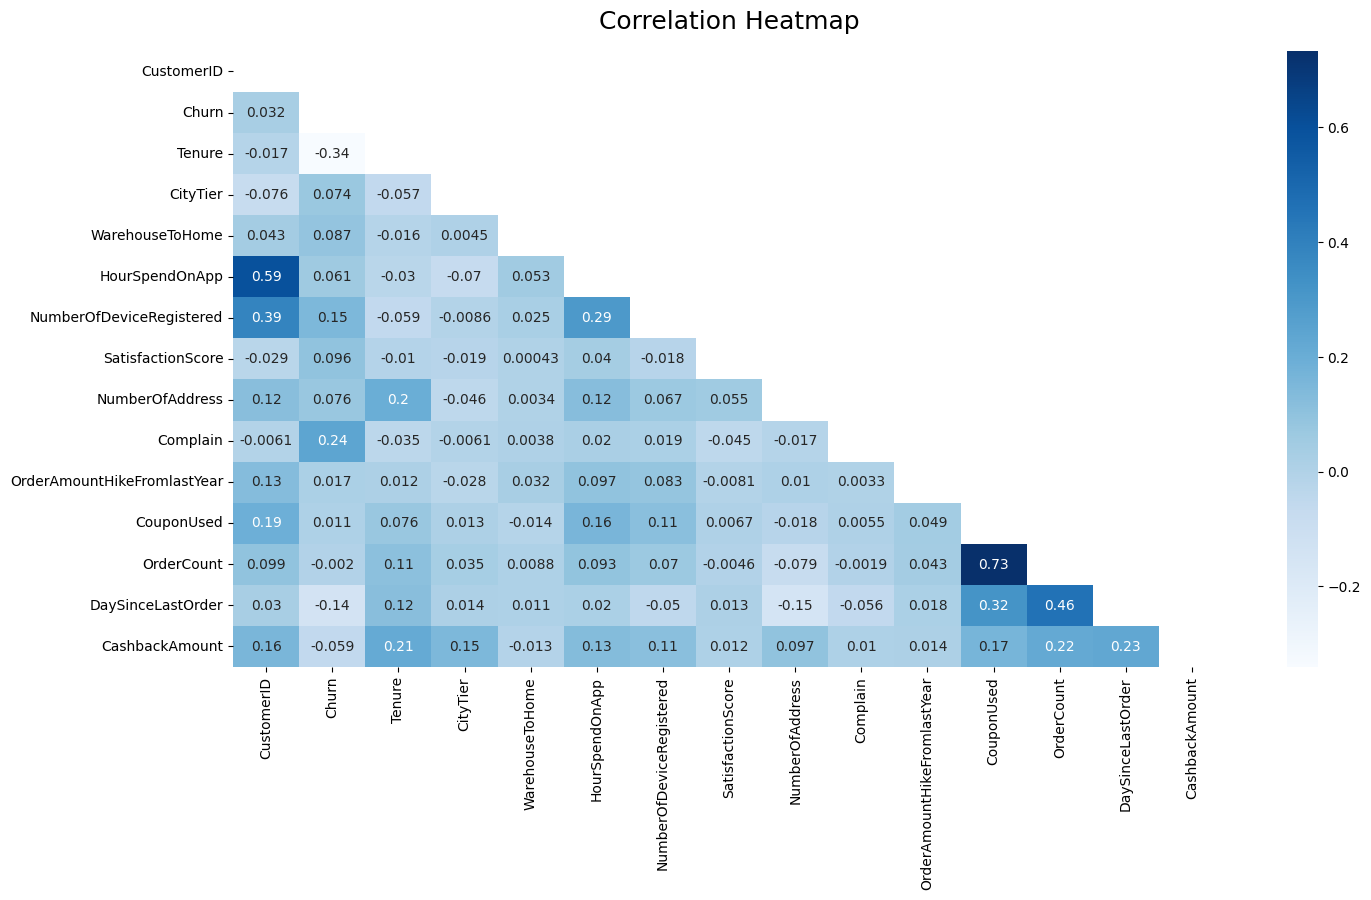

In [ ]:
# Correlation Analysis
plt.figure(figsize=(16, 8))

# Create mask for diagonal correlation plot
mask = np.triu(np.ones_like(new_df.corr(), dtype=np.bool))

# Plot the heatmap
heatmap = sns.heatmap(new_df.corr(), mask=mask, annot=True, cmap='Blues' )
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

**Modeling**

In [ ]:
# split the dataset into train & test
x = new_df.drop(columns=['CustomerID','Churn'])
y = new_df['Churn']

from sklearn.model_selection import train_test_split
# test data will contain 20% of the dataset and train will contain 70% of the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# label encoding
!pip install feature_engine
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import OrdinalEncoder
def label_encoding(x_train,
                   x_test):
  ordinal_encoder = OrdinalEncoder(encoding_method='arbitrary',
variables='Gender')
  ordinal_encoder.fit(x_train)
  x_train = ordinal_encoder.transform(x_train)
  x_test = ordinal_encoder.transform(x_test)
  return x_train, x_test

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 5.3 MB/s eta 0:00:00


In [ ]:
x_train, x_test = label_encoding(x_train,x_test)

In [ ]:
# one hot encoding
def label_ohe(x_train,
              x_test):
  cat_features = ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']
  ohe_encoder = OneHotEncoder(variables=cat_features)
  ohe_encoder.fit(x_train)
  x_train = ohe_encoder.transform(x_train)
  x_test = ohe_encoder.transform(x_test)

  return x_train, x_test

x_train , x_test=label_ohe(x_train, x_test)
x_train

,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_Cash on Delivery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Fashion,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Mobile,PreferedOrderCat_Others,PreferedOrderCat_Grocery,MaritalStatus_Single,MaritalStatus_Married,MaritalStatus_Divorced
2565,9.0,3,8.0,0,2.0,3,1,4,0,15.0,...,0,1,0,0,0,0,0,1,0,0
3199,7.0,1,13.0,1,2.0,4,2,5,0,24.0,...,0,1,0,0,0,0,0,0,1,0
5518,5.0,3,17.0,0,3.0,4,1,4,1,12.0,...,0,1,0,0,0,0,0,0,1,0
2038,0.0,3,9.0,1,2.0,4,1,2,1,11.0,...,0,0,1,0,0,0,0,0,1,0
1654,4.0,1,11.0,1,2.0,3,1,1,1,12.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,5.0,1,14.0,0,3.0,1,3,6,0,12.0,...,0,1,0,0,0,0,0,0,1,0
2277,0.0,1,13.0,0,2.0,3,3,4,1,13.0,...,0,0,0,0,1,0,0,0,1,0
1495,13.0,1,32.0,0,2.0,3,4,2,0,11.0,...,0,1,0,0,0,0,0,0,1,0
5296,1.0,1,31.0,1,3.0,4,4,3,1,18.0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
import sklearn.linear_model as lm
model = lm.LogisticRegression(penalty = 'none', fit_intercept = False, solver = 'lbfgs')

# fitting the model
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(fit_intercept=False, penalty='none')

In [ ]:
# assessing the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred = model.predict(x_test)
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy_lr = accuracy_score(y_test, y_pred)
confusion_matrix_lr = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy_lr )
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9037952338923213
Precision: 0.7652173913043478
Recall: 0.5176470588235295
F1-Score: 0.617543859649123


In [ ]:
# UNPRUNED TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

model_decision_tree = DecisionTreeClassifier(random_state=42)

model_decision_tree.fit(x_train, y_train)

# Make predictions
y_pred_decision_tree = model_decision_tree.predict(x_test)

# Model evaluation
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
confusion_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
precision = precision_score(y_test, y_pred_decision_tree)
recall = recall_score(y_test, y_pred_decision_tree)
f1 = f1_score(y_test, y_pred_decision_tree)

print("Unpruned Decision Tree Accuracy:", accuracy_decision_tree)
print("Unpruned Decision Tree Confusion Matrix:\n", confusion_matrix_decision_tree)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Predicting the train data
y_train_decision_tree = model_decision_tree.predict(x_train)

# Model evaluation
accuracy_decision_tree_train = accuracy_score(y_train, y_train_decision_tree)

print("Training accuracy: ",accuracy_decision_tree_train)

Unpruned Decision Tree Accuracy: 0.9567519858781994
Unpruned Decision Tree Confusion Matrix:
 [[939  24]
 [ 25 145]]
Precision: 0.8579881656804734
Recall: 0.8529411764705882
F1-Score: 0.8554572271386431
Training accuracy:  1.0


In [ ]:
## PRUNED DECISION TREE

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# Preventing tree growth - don't split nodes with < 1% of the samples , max_depth = 7
min_samples_split = int(0.01 * len(x_train))

model_decision_tree = DecisionTreeClassifier(min_samples_split=min_samples_split,max_depth=7,random_state=42)

model_decision_tree.fit(x_train, y_train)

y_pred_decision_tree = model_decision_tree.predict(x_test)

# Model evaluation
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
confusion_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
precision = precision_score(y_test, y_pred_decision_tree)
recall = recall_score(y_test, y_pred_decision_tree)
f1 = f1_score(y_test, y_pred_decision_tree)

print("Pruned Decision Tree Accuracy:", accuracy_decision_tree)
print("Pruned Decision Tree Confusion Matrix:\n", confusion_matrix_decision_tree)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

y_train_decision_tree = model_decision_tree.predict(x_train)

# Model evaluation
accuracy_decision_tree_train = accuracy_score(y_train, y_train_decision_tree)

print("Training accuracy: ",accuracy_decision_tree_train)

Pruned Decision Tree Accuracy: 0.910856134157105
Pruned Decision Tree Confusion Matrix:
 [[924  39]
 [ 62 108]]
Precision: 0.7346938775510204
Recall: 0.6352941176470588
F1-Score: 0.6813880126182965
Training accuracy:  0.9310867095797046


In [ ]:
## RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(criterion='entropy',
    n_estimators=10,
    random_state=1,
    n_jobs=2)

random_forest_model.fit(x_train, y_train)

# predictions on the test set
y_pred_random_forest = random_forest_model.predict(x_test)

# Model evaluation
accuracy_rf = accuracy_score(y_test, y_pred_random_forest)
precision_rf = precision_score(y_test, y_pred_random_forest)
recall_rf = recall_score(y_test, y_pred_random_forest)
f1_rf = f1_score(y_test, y_pred_random_forest)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_random_forest)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1-Score:", f1_rf)
print("Random Forest Confusion Matrix:\n", confusion_matrix_rf)

Random Forest Accuracy: 0.940864960282436
Random Forest Precision: 0.905511811023622
Random Forest Recall: 0.6764705882352942
Random Forest F1-Score: 0.7744107744107743
Random Forest Confusion Matrix:
 [[951  12]
 [ 55 115]]


Observations:

Accuracy: The Random Forest model has a higher accuracy compared to the pruned Decision Tree. This suggests that the Random Forest is performing better on the given test set.

Precision: The precision of the Random Forest is higher, indicating that it has a lower rate of false positives compared to the pruned Decision Tree.

Recall: The pruned Decision Tree has a higher recall, suggesting that it is better at capturing true positive instances compared to the Random Forest.

F1-Score: The F1-Score is a balance between precision and recall. The Random Forest has a higher F1-Score, indicating a better overall balance between precision and recall compared to the pruned Decision Tree.

Training Accuracy: The pruned Decision Tree has a lower training accuracy than the Random Forest, which is expected as pruning usually results in a less complex model.

Deciding which model is "better" depends on the specific goals. If we prioritize precision (minimizing false positives), the Random Forest might be preferable. If capturing all positive instances (maximizing recall) is crucial, the pruned Decision Tree might be more suitable.



In [ ]:
# Decision tree feature importance

# Assuming your pruned Decision Tree model is stored in 'model_decision_tree'
feature_importance_decision_tree = model_decision_tree.feature_importances_

# Create a DataFrame to display feature names and their importance scores
df_feature_importance_decision_tree = pd.DataFrame(
    {'Feature': x_train.columns, 'Importance': feature_importance_decision_tree}
)

# Sort the DataFrame by importance in descending order
df_feature_importance_decision_tree = df_feature_importance_decision_tree.sort_values(
    by='Importance', ascending=False
)

# Display the feature importance
print(df_feature_importance_decision_tree)

                                  Feature  Importance
0                                  Tenure    0.471515
8                                Complain    0.099690
7                         NumberOfAddress    0.095421
12                      DaySinceLastOrder    0.065603
2                         WarehouseToHome    0.055387
9             OrderAmountHikeFromlastYear    0.037737
30                   MaritalStatus_Single    0.026894
24    PreferedOrderCat_Laptop & Accessory    0.025906
5                NumberOfDeviceRegistered    0.025872
6                       SatisfactionScore    0.018270
1                                CityTier    0.016212
15          PreferredLoginDevice_Computer    0.013180
16      PreferredLoginDevice_Mobile Phone    0.011899
18       PreferredPaymentMode_Credit Card    0.011346
13                         CashbackAmount    0.010452
4                          HourSpendOnApp    0.006304
25               PreferedOrderCat_Fashion    0.003294
10                          

In [ ]:
# Random forest feature importance

# Assuming your Random Forest model is stored in 'random_forest_model'
feature_importance_random_forest = random_forest_model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
df_feature_importance_random_forest = pd.DataFrame(
    {'Feature': x_train.columns, 'Importance': feature_importance_random_forest}
)

# Sort the DataFrame by importance in descending order
df_feature_importance_random_forest = df_feature_importance_random_forest.sort_values(
    by='Importance', ascending=False
)

# Display the feature importance
print(df_feature_importance_random_forest)

                                  Feature  Importance
0                                  Tenure    0.243432
2                         WarehouseToHome    0.075840
13                         CashbackAmount    0.070549
7                         NumberOfAddress    0.064670
12                      DaySinceLastOrder    0.058423
9             OrderAmountHikeFromlastYear    0.047792
8                                Complain    0.045635
5                NumberOfDeviceRegistered    0.043693
6                       SatisfactionScore    0.042697
11                             OrderCount    0.032452
24    PreferedOrderCat_Laptop & Accessory    0.028947
10                             CouponUsed    0.024885
4                          HourSpendOnApp    0.021961
1                                CityTier    0.021445
30                   MaritalStatus_Single    0.020153
3                                  Gender    0.018563
31                  MaritalStatus_Married    0.017441
15          PreferredLoginDe

In [ ]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 17.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, RocCurveDisplay

Random Forest Accuracy: 0.940864960282436
Random Forest ROC Area under Curve: 0.8320047645226315
Random Forest Precision: 0.905511811023622
Random Forest Recall: 0.6764705882352942
Random Forest F1-Score: 0.7744107744107743
Classification Report:
               precision    recall  f1-score   support

           0    0.94533   0.98754   0.96597       963
           1    0.90551   0.67647   0.77441       170

    accuracy                        0.94086      1133
   macro avg    0.92542   0.83200   0.87019      1133
weighted avg    0.93935   0.94086   0.93723      1133



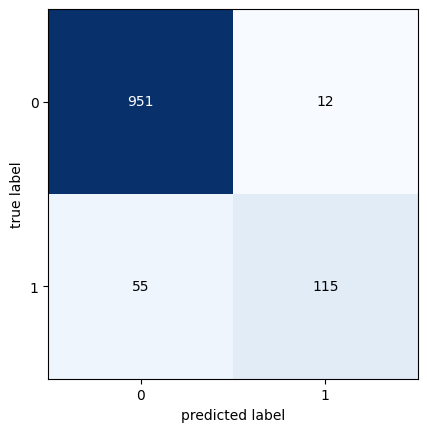

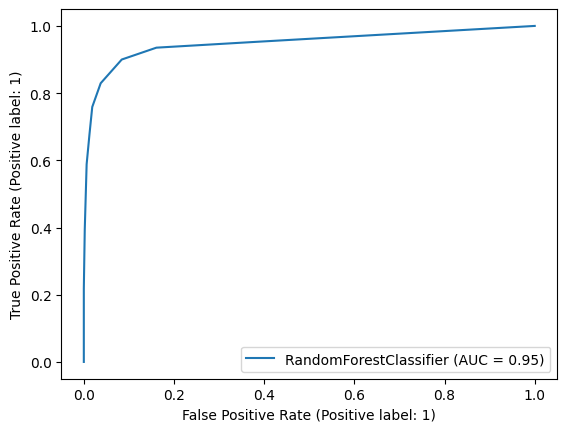

In [ ]:
# Model Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_random_forest)
roc_auc_rf = roc_auc_score(y_test, y_pred_random_forest)
precision_rf = precision_score(y_test, y_pred_random_forest)
recall_rf = recall_score(y_test, y_pred_random_forest)
f1_rf = f1_score(y_test, y_pred_random_forest)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_random_forest)

# Print Results
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest ROC Area under Curve:", roc_auc_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1-Score:", f1_rf)

# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_random_forest, digits=5))

# Plot Confusion Matrix
plot_confusion_matrix(confusion_matrix_rf)

# Plot ROC Curve
RocCurveDisplay.from_estimator(random_forest_model, x_test, y_test)